# Análise dos Dados do Enem 2021

## Avalição da Nota de Ciências da Natureza

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

pd.set_option('display.max_columns', None)

### Base de Dados

In [2]:
%time Enem_21 = pd.read_csv('./MICRODADOS_ENEM_2021.csv', encoding='ISO-8859-1', sep=';')
Enem_21.head()

CPU times: total: 46.8 s
Wall time: 1min 1s


,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3144805,Nova Lima,31,MG,0,1,1,0,NaN,881.0,892.0,NaN,NaN,574.6,472.6,NaN,NaN,BBCCECEABCEABADDAAEECBEBADADAAABABBABBACCCBBB,99999BADDEAEBACADADDAEABCEECDDBBAEADEDEABADBBA...,NaN,1,NaN,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,NaN,1.0,140.0,120.0,120.0,180.0,200.0,760.0,F,F,B,B,3.0,D,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2704302,Maceió,27,AL,1,1,1,1,912.0,882.0,891.0,901.0,505.9,551.8,498.3,461.5,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,99999ACECCEEBACDABACBECBBCDBDEBDDCCCDECCDDCCCC...,CDCCBCCCDCCCCBEACEECAEABECCCDCBBCABACDAEDCCEC,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,B,B,B,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3515707,Ferraz de Vasconcelos,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,3.0,C,A,B,B,A,A,B,B,A,A,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,1.0,0,2304202.0,Crato,23.0,CE,2.0,1.0,1.0,2304202,Crato,23,CE,1,1,1,1,911.0,880.0,890.0,902.0,580.7,678.9,638.9,659.5,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,180.0,120.0,200.0,160.0,780.0,B,B,B,B,6.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,1.0,0,2311603.0,Redenção,23.0,CE,2.0,1.0,1.0,2300150,Acarape,23,CE,1,1,1,1,912.0,882.0,891.0,901.0,497.7,532.4,457.6,582.6,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,140.0,160.0,180.0,180.0,780.0,D,E,F,D,4.0,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B


#### Dados filtrados por presença e removido a nota 0

In [43]:
base_Enm_21_Fitro = Enem_21.loc[(Enem_21.loc[:,'TP_PRESENCA_CN'] == 1) & 
                                 (Enem_21.loc[:,'NU_NOTA_CN'] != 0)]

In [44]:
base_Enm_21_Fitro.shape

(2245451, 76)

In [5]:
Ausencia = Enem_21.loc[(Enem_21.loc[:,'TP_PRESENCA_CN'] == 0)]
Ausencia.shape

(1142539, 76)

### Bibliotéca de Funções

<hr>

In [45]:
# Esta função gera um describe da nota, pelas classes da coluna desejada.

def Estat_Desc (clmn_1, clmn_2):
    
    Estat_Desc = pd.DataFrame()
    total = base[base[clmn_1].notnull()][coluna_1].count()
    count_percent = []
    
    
    for k, v in Dicionario_Labels.items():
        Estat_Desc[k] = base.loc[base.loc[:,clmn_1] == v, clmn_2].describe().round(2)
        percentagem = (base.loc[base.loc[:,clmn_1] == v,clmn_2].count() / total)*100
        count_percent.append(percentagem.round(2))
    
    Estat_Desc = Estat_Desc.T
    Estat_Desc.insert(loc = 1, column = 'count_%', value = count_percent)
    Estat_Desc = Estat_Desc.T
    
    print()
    print(titulo)
    return Estat_Desc

In [46]:
# Esta função gera um gráfico Boxplot da nota, pelas classes da coluna desejada.

def Box_Plot (clmn_1, clmn_2):
    
    lst_k = []
    lst_v = []
    
    for k, v in Dicionario_Labels.items():
        lst_k.append(k)
        lst_v.append(v)
        
    plt.figure(figsize=(15,5))
    sbn.boxplot(x=clmn_1, y=clmn_2, showmeans=True, data=base, showfliers=Outliers, order=lst_v)
    plt.title(titulo, fontsize=15)
    plt.xlabel(clmn_1, fontsize=12)
    plt.ylabel(clmn_2, fontsize=12)
    ticks, labels = plt.xticks()
    plt.xticks(ticks, labels=lst_k)
    plt.show

In [47]:
# Esta função gera gráficos de Histograma da nota, pelas classes da coluna desejada.

def Hist_Plot (clmn_1, clmn_2):
        
    qtd_lnh = int(len(Dicionario_Labels)/2 if len(Dicionario_Labels)%2 == 0 else (len(Dicionario_Labels)+1)/2)
    qtd_lnh = 2 if qtd_lnh == 1 else qtd_lnh
    fig, ax = plt.subplots(qtd_lnh, 2, figsize=(12,8), constrained_layout=True)
   
           
    count_k = -1
    lnh_pos = -1
        
    for k, v in Dicionario_Labels.items():
        count_k += 1
                       
        if count_k%2 == 0:
            lnh_pos += 1                       
            ax[lnh_pos,0].hist(x = base.loc[base.loc[:,clmn_1] == v,clmn_2], bins=15)
            ax[lnh_pos,0].set_title(k)
            ax[lnh_pos,0].set_xlabel(clmn_2, fontsize=7)
            
            
        else:
            ax[lnh_pos,1].hist(x = base.loc[base.loc[:,clmn_1] == v,clmn_2], bins=15)
            ax[lnh_pos,1].set_title(k)
            ax[lnh_pos,1].set_xlabel(clmn_2, fontsize=7)
            
    plt.show()

In [ ]:
# Avaliação da variação da média por

titulo = ''
coluna_1 = ''                  # Clases
coluna_2 = ''                  # Notas
base = base_Enm_21_Fitro

vrl_k = []
vrl_v = sorted(base[coluna_1].unique())
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
Dicionario_Labels = {}


display(Estat_Desc(coluna_1, coluna_2))

Outliers = True

Box_Plot(coluna_1, coluna_2)

Hist_Plot(coluna_1, coluna_2)

print('=======================================================================================================================')

<hr>

In [ ]:
base_Enm_21_Fitro.isnull().sum()

In [48]:
coluna_2 = 'NU_NOTA_CN'        # Notas de Ciência da Natureza
base = base_Enm_21_Fitro
nota = 'CN'


Avaliação da variação da Nota CN por Faixa Etária.


,<17,17,18,19,20,21,22,23,24,25,26-30,31-35,36-40,41-45,46-50,51-55,56-60,61-65,66-70,>70
count,234441.00,518205.00,525781.00,260605.00,151791.00,99704.00,70047.00,50851.00,41088.00,32594.00,99060.00,56083.00,40857.00,27124.00,17595.00,10629.00,5705.00,2231.00,748.00,312.00
count_%,10.44,23.08,23.42,11.61,6.76,4.44,3.12,2.26,1.83,1.45,4.41,2.50,1.82,1.21,0.78,0.47,0.25,0.10,0.03,0.01
mean,486.07,490.65,488.27,492.48,496.64,499.83,500.07,500.19,499.02,499.12,499.59,499.90,493.13,485.13,481.65,481.77,482.22,479.31,469.11,465.34
std,72.15,77.86,79.59,83.77,86.86,87.95,87.55,86.30,84.22,82.75,81.79,78.83,75.79,71.52,69.32,68.56,69.48,69.98,66.80,64.76
min,324.90,312.30,310.10,311.60,310.40,309.00,308.50,309.70,308.60,314.50,308.30,307.60,309.60,310.30,311.00,310.80,307.70,312.10,332.50,339.70
25%,430.70,431.10,427.90,428.70,430.70,433.00,433.70,434.60,435.40,436.90,438.20,441.00,437.60,433.90,431.50,433.20,431.50,427.60,419.55,417.60
50%,480.60,482.20,477.90,480.50,483.20,486.10,487.30,488.50,488.50,489.00,490.10,492.50,484.80,478.10,474.50,476.30,475.10,472.10,461.65,463.05
75%,538.80,545.00,541.70,547.60,553.50,557.40,557.70,557.10,554.30,554.10,554.70,553.15,543.40,530.60,524.60,524.40,526.90,522.90,513.32,509.42
max,819.30,848.70,867.10,867.10,867.10,848.70,856.60,823.90,846.50,848.40,867.10,856.60,839.00,774.70,812.70,764.90,753.00,746.10,714.90,651.10


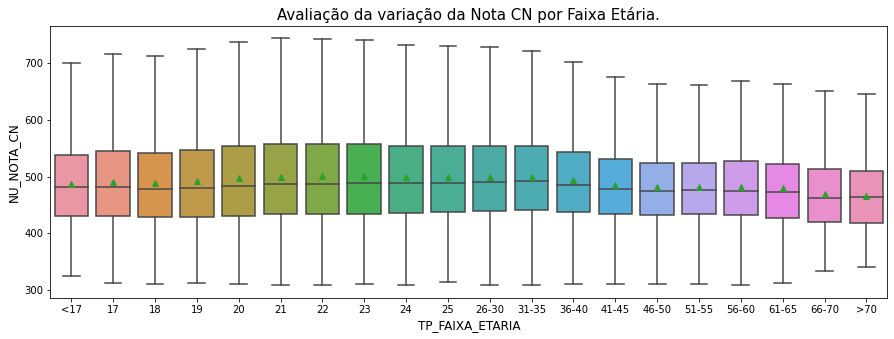

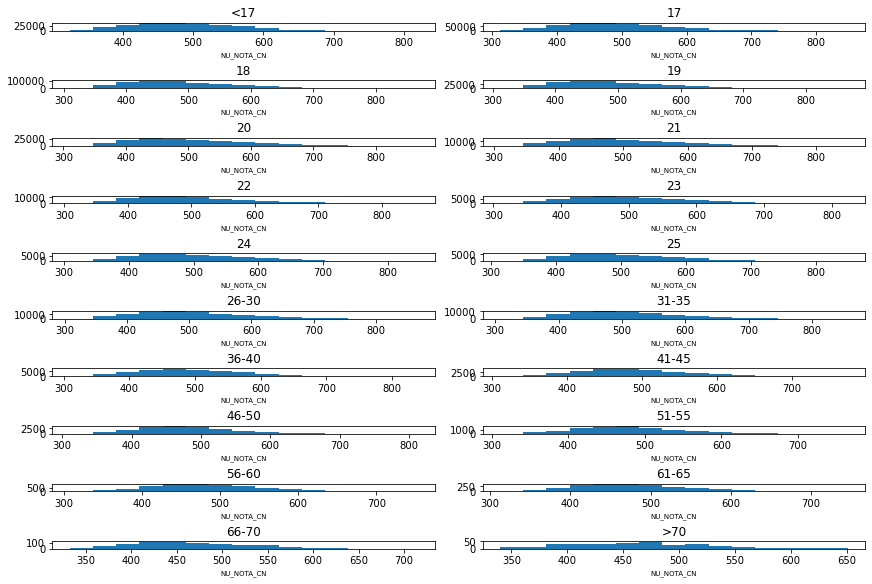




Avaliação da variação da Nota CN por sexo


,SEXO_FEMININO,SEXO_MASCULINO
count,1385878.00,859573.00
count_%,61.72,38.28
mean,483.18,505.89
std,76.64,84.02
min,307.70,307.60
25%,426.00,441.20
50%,473.00,499.70
75%,531.80,565.60
max,867.10,867.10


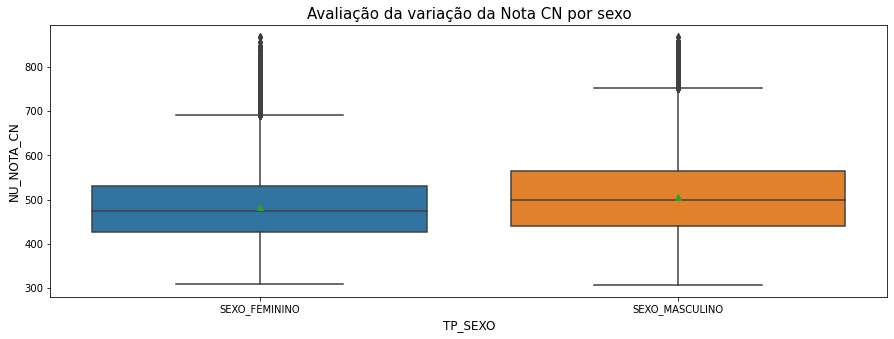

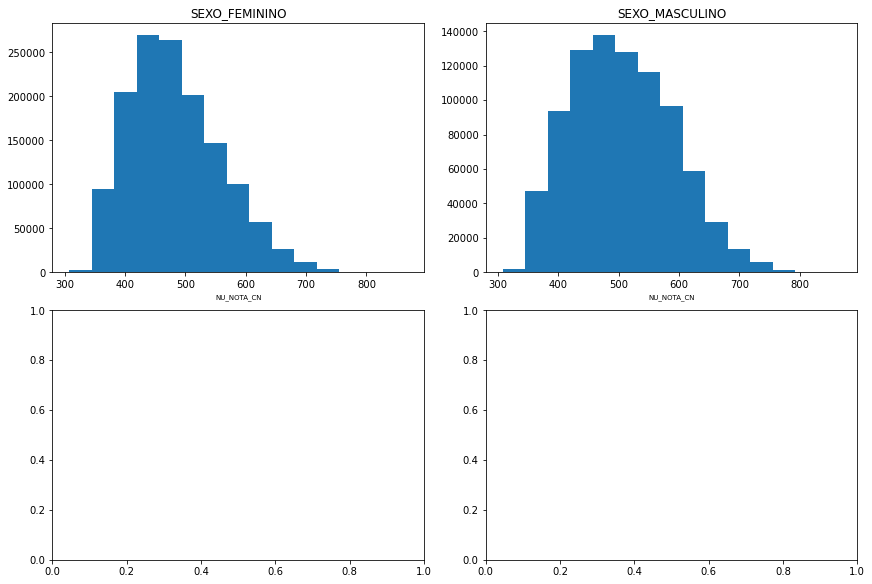




Avaliação da variação da Nota CN por Raça


,Nao declarado,Branca,Preta,Parda,Amarela,Indigena,Nao dispoe da informacao
count,43967.00,982217.00,247407.00,916178.00,45074.00,10606.00,2.00
count_%,1.96,43.74,11.02,40.80,2.01,0.47,0.00
mean,494.06,511.77,471.47,476.32,493.98,450.40,501.50
std,84.13,83.74,69.01,73.85,86.19,63.17,11.31
min,310.60,307.60,308.60,307.70,309.80,308.50,493.50
25%,429.10,447.60,420.20,421.10,429.00,403.40,497.50
50%,483.50,505.80,464.10,466.90,479.40,441.90,501.50
75%,552.50,571.20,514.90,523.00,548.80,487.50,505.50
max,856.60,867.10,856.60,856.60,856.60,748.60,509.50


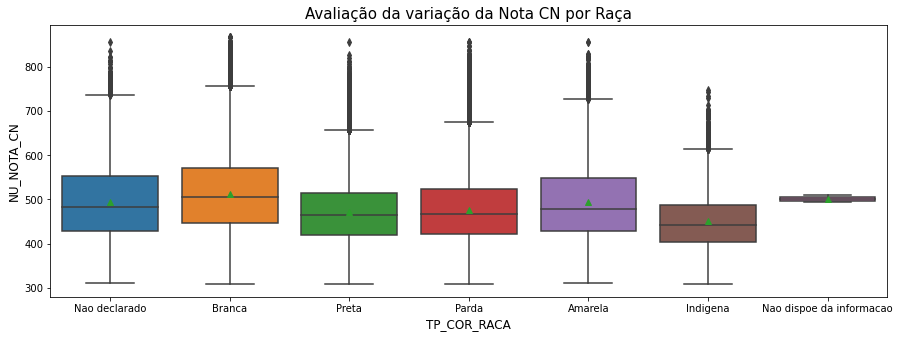

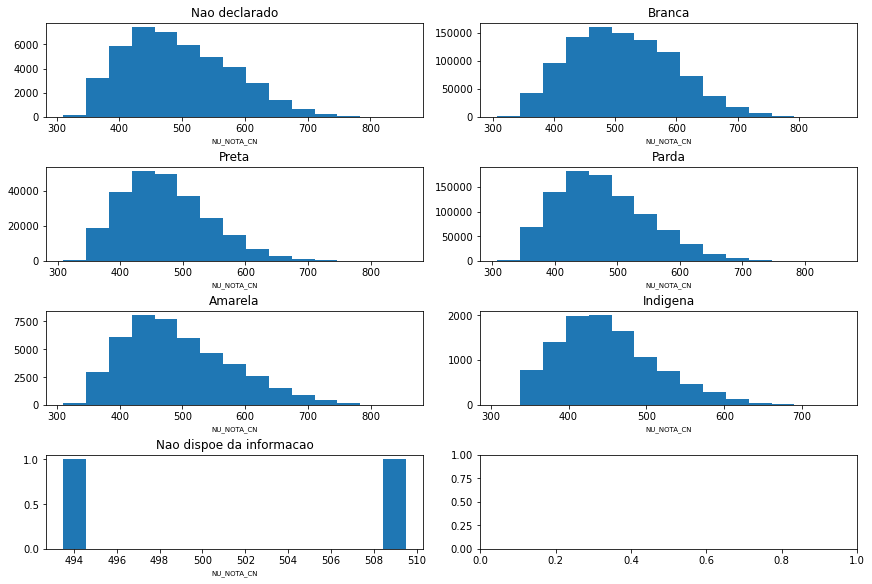




Avaliação da variação da Nota CN por Ano de Conclusão Ensino Médio.


,Nao informado,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,Antes 2007
count,1308401.00,277320.00,158692.00,100275.00,70916.00,50604.00,38987.00,31036.00,24785.00,21009.00,17021.00,15395.00,13860.00,11896.00,11072.00,94182.00
count_%,58.27,12.35,7.07,4.47,3.16,2.25,1.74,1.38,1.10,0.94,0.76,0.69,0.62,0.53,0.49,4.19
mean,482.64,499.25,503.85,506.42,509.72,511.76,509.50,508.87,509.40,508.40,510.71,506.95,508.78,510.61,506.30,505.00
std,75.56,83.33,87.00,88.70,89.59,88.59,86.45,84.63,83.25,83.00,82.35,82.20,81.33,81.14,79.16,76.98
min,307.70,308.60,310.40,309.00,308.90,307.60,310.40,311.10,309.70,308.30,309.20,308.80,311.70,311.00,310.60,309.60
25%,425.10,435.90,437.70,438.80,441.30,444.00,444.20,445.20,446.70,445.90,448.30,445.55,448.90,449.30,448.10,448.20
50%,473.70,488.95,491.90,493.70,497.40,501.00,499.40,499.80,500.80,500.70,504.00,498.90,501.40,503.60,498.70,499.20
75%,534.20,556.10,562.00,565.80,570.90,572.40,567.90,566.22,566.50,566.10,567.70,563.20,564.10,567.22,560.72,558.00
max,856.60,867.10,867.10,856.60,848.70,856.60,846.50,827.10,848.40,856.60,867.10,848.40,827.80,829.30,822.50,856.60


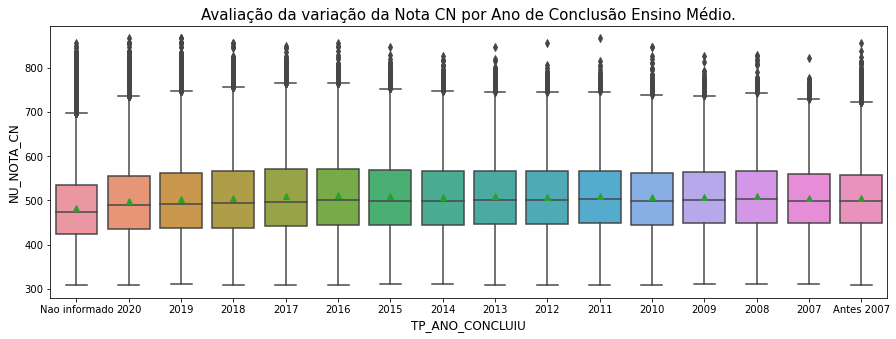

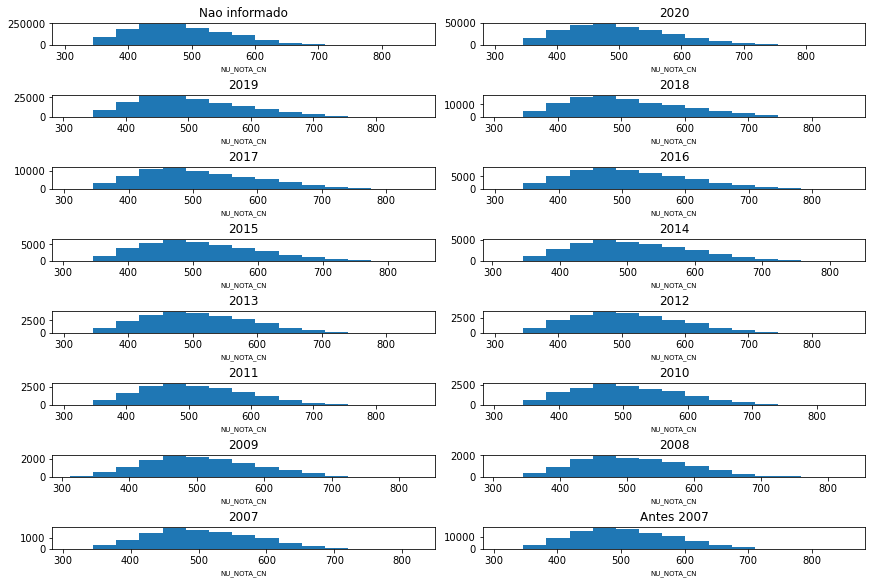




Avaliação da variação da Nota CN por Escola Pública/Privada.


,Nao Respondeu,Publica,Privada
count,1395602.00,670321.00,179528.00
count_%,62.15,29.85,8.00
mean,496.60,469.39,539.03
std,81.47,69.29,82.87
min,307.60,312.30,339.70
25%,435.20,417.20,477.20
50%,486.90,461.30,542.50
75%,551.20,514.50,598.90
max,867.10,848.70,844.50


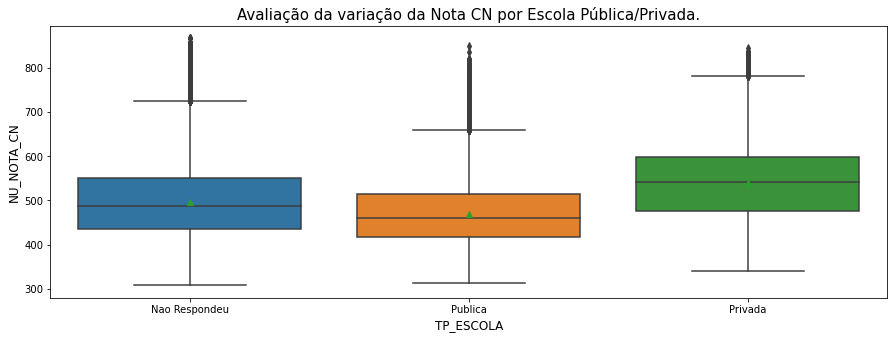

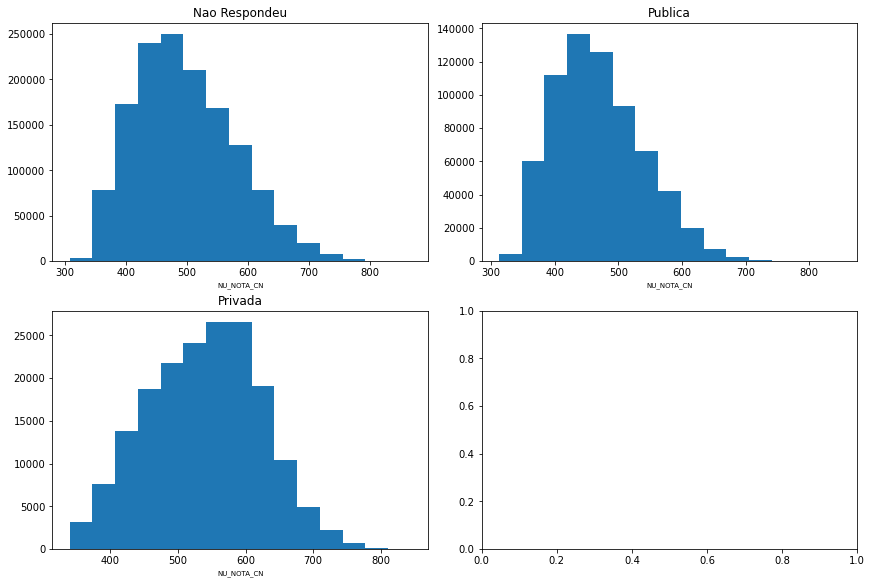




Avaliação da variação da Nota CN por região da aplicação da prova.


,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
count,12757.00,38773.00,44839.00,13051.00,175336.00,143658.00,45150.00,42186.00,84252.00,85202.00,219926.00,26987.00,35202.00,119690.00,70971.00,131916.00,56784.00,96320.00,158153.00,56495.00,18788.00,4871.00,101110.00,54438.00,37468.00,351273.00,19855.00
count_%,0.57,1.73,2.00,0.58,7.81,6.40,2.01,1.88,3.75,3.79,9.79,1.20,1.57,5.33,3.16,5.87,2.53,4.29,7.04,2.52,0.84,0.22,4.50,2.42,1.67,15.64,0.88
mean,469.59,476.74,460.39,467.70,479.99,477.15,508.77,503.96,487.08,466.03,508.69,488.69,483.72,469.59,479.24,481.03,473.77,504.06,501.59,490.35,475.58,484.27,503.16,508.96,481.58,512.44,473.29
std,69.36,75.27,69.11,70.38,74.87,79.07,85.85,80.85,80.30,70.59,81.91,79.89,75.19,70.73,77.02,76.76,77.17,81.07,80.20,79.91,70.29,75.21,77.95,78.69,80.20,83.62,74.41
min,319.50,310.60,308.70,316.50,310.40,309.60,309.50,310.30,308.80,308.80,309.60,313.30,315.70,308.60,309.70,308.30,307.70,308.50,309.20,312.50,310.30,323.80,309.10,311.00,308.60,307.60,311.40
25%,418.30,420.60,408.80,415.10,424.30,417.70,442.10,442.80,426.90,413.50,446.30,428.20,427.10,417.10,421.80,423.10,416.68,442.30,440.60,430.00,423.20,427.15,444.40,449.80,421.90,448.80,417.60
50%,461.70,466.60,450.80,458.90,470.40,465.00,500.10,496.70,475.90,456.50,502.20,477.30,475.20,460.50,468.40,471.20,461.90,496.40,494.60,480.40,467.90,475.80,497.10,504.45,469.10,505.80,462.60
75%,512.00,524.10,501.40,510.70,527.60,525.90,569.68,560.00,539.00,508.50,566.90,540.60,533.10,512.80,527.20,530.90,519.10,560.30,558.00,542.50,522.02,535.15,557.10,564.80,530.70,571.00,518.65
max,752.50,844.50,790.70,747.40,839.00,867.10,848.40,839.00,856.60,818.00,856.60,837.20,820.80,810.10,856.60,816.40,835.10,867.10,856.60,856.60,829.30,758.30,858.80,856.60,827.80,867.10,820.70


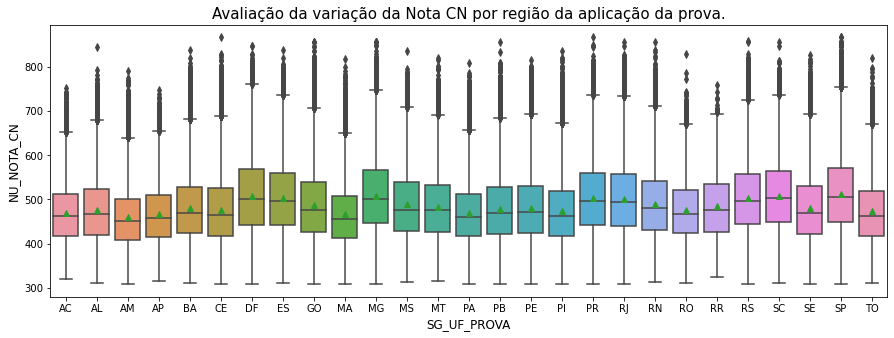

C:\Users\LHST\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


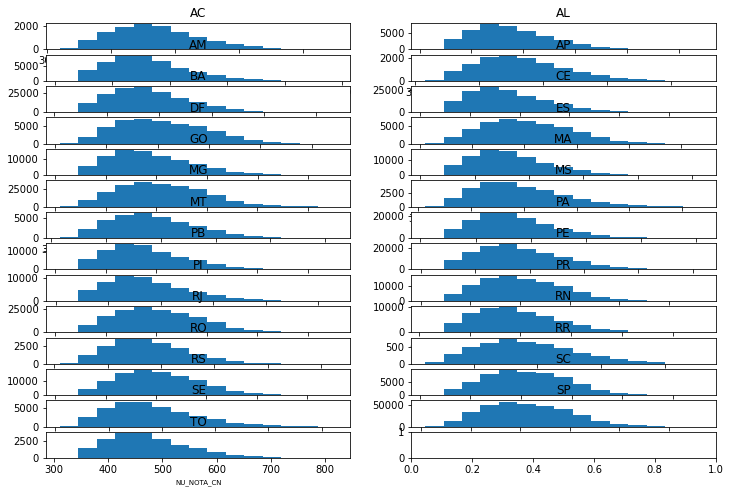




Avaliação da variação da Nota CN por Nível de Estudo do Responsável Homem.


,Nunca estudou,5º Incompleto,5º Fundamental,9º Fundamental,Ensino Médio,Faculdade,Pós-graduação,Não sei
count,76766.00,351273.00,282415.00,246391.00,683521.00,247192.00,184235.00,173657.00
count_%,3.42,15.64,12.58,10.97,30.44,11.01,8.20,7.73
mean,455.12,466.52,475.51,481.26,495.71,533.34,543.73,471.92
std,62.32,67.20,71.41,74.35,78.73,86.02,87.98,70.87
min,307.60,308.30,308.70,309.70,309.60,311.00,318.50,308.60
25%,409.10,416.80,422.40,425.40,436.00,468.10,477.30,419.00
50%,449.00,459.40,467.30,472.60,487.90,533.80,546.80,463.20
75%,492.90,508.40,521.00,529.90,550.00,594.80,606.30,516.80
max,856.60,856.60,846.30,856.60,856.60,867.10,867.10,835.10


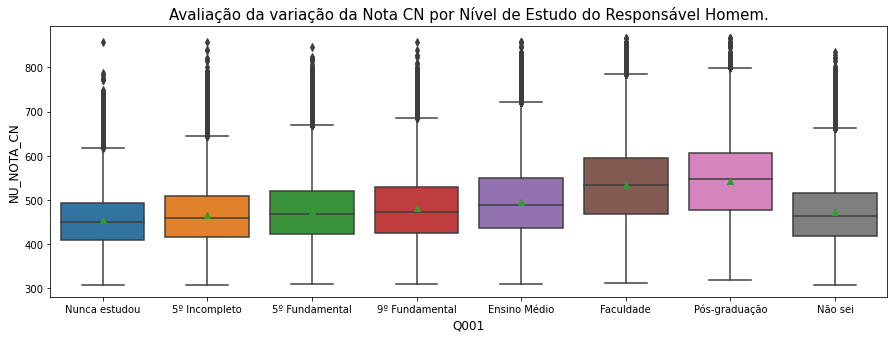

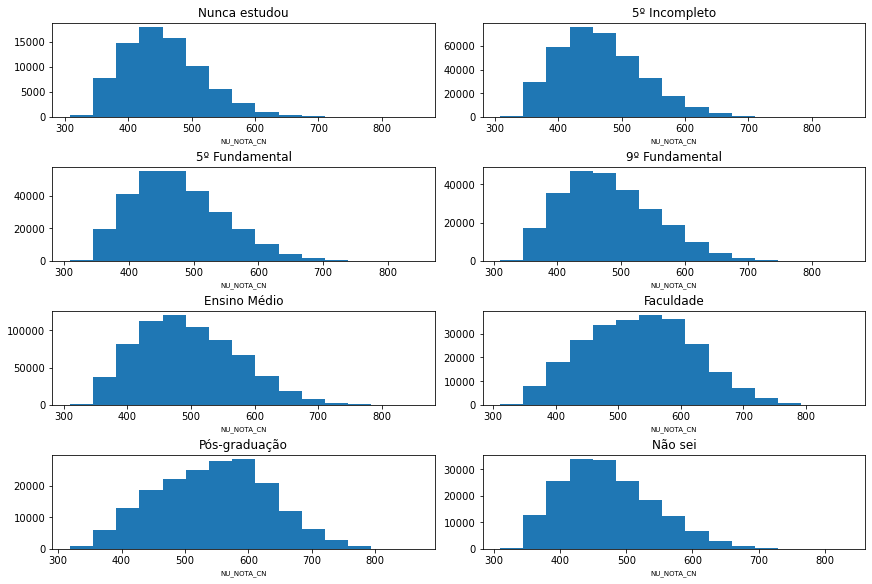




Avaliação da variação da Nota CN por Nível de Estudo do Responsável Mulher.


,Nunca estudou,5º Incompleto,5º Fundamental,9º Fundamental,Ensino Médio,Faculdade,Pós-graduação,Não sei
count,48343.00,244418.00,227096.00,246330.00,797291.00,322097.00,310674.00,49201.00
count_%,2.15,10.89,10.11,10.97,35.51,14.34,13.84,2.19
mean,453.41,463.64,470.26,474.18,489.04,522.74,529.71,462.99
std,60.67,65.41,69.14,71.48,76.72,85.92,87.06,69.97
min,307.60,307.70,310.30,308.90,308.60,309.00,308.80,310.10
25%,409.10,415.30,419.00,420.90,431.30,456.80,463.00,411.30
50%,447.90,457.20,462.60,465.35,480.60,519.90,529.10,453.40
75%,490.70,504.50,513.60,519.50,540.70,584.50,592.60,504.50
max,856.60,867.10,839.00,856.60,856.60,867.10,867.10,816.40


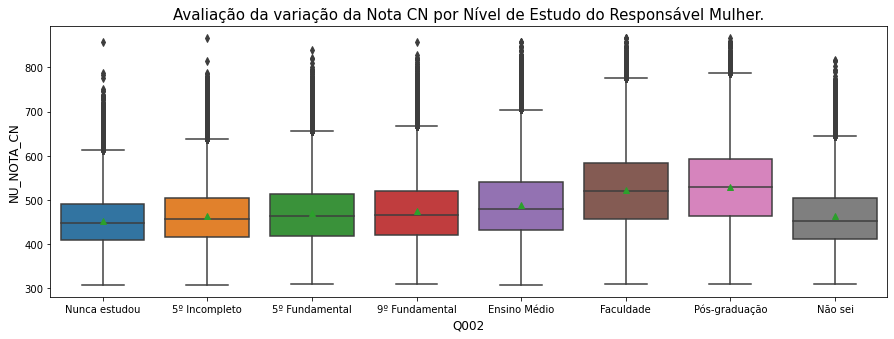

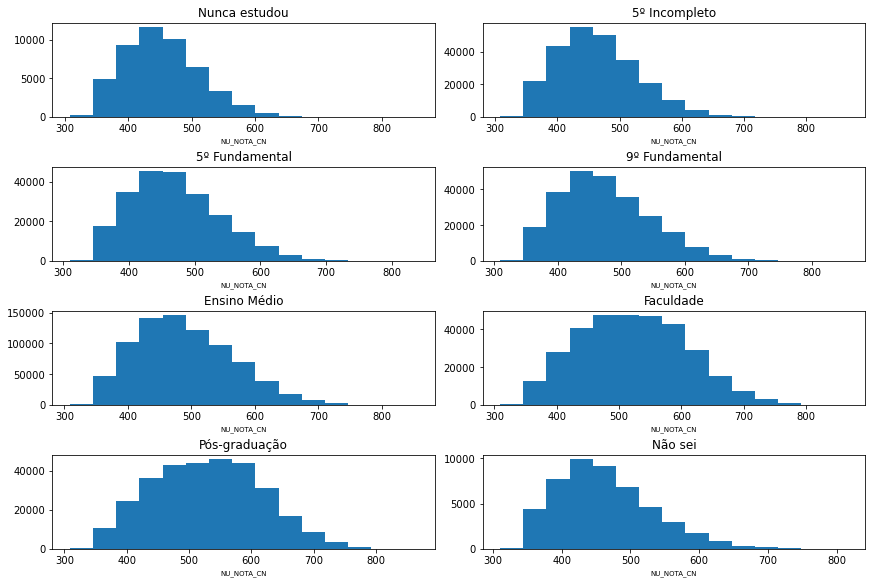




Avaliação da variação da Nota CN por Qtd de Residentes.


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
count,48150.00,269164.00,614680.00,798993.00,343255.00,107975.00,36943.00,14837.00,5559.00,3193.00,1097.00,705.00,298.00,181.00,124.00,61.00,31.00,33.00,22.00,149.00
count_%,2.14,11.99,27.37,35.58,15.29,4.81,1.65,0.66,0.25,0.14,0.05,0.03,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.01
mean,505.46,493.71,495.00,495.68,485.04,474.19,465.79,460.30,456.19,451.83,452.38,448.59,449.12,458.10,439.85,465.95,443.01,469.66,459.92,466.46
std,81.59,79.47,80.36,81.71,78.62,74.42,70.96,67.71,66.30,66.55,64.45,60.71,65.12,73.23,62.48,72.12,62.52,91.95,72.94,90.12
min,307.60,308.80,308.60,308.30,308.70,311.00,312.50,312.40,315.80,316.20,319.90,326.60,344.70,345.50,342.10,357.40,355.20,345.90,361.30,309.50
25%,443.90,433.70,434.10,433.50,425.90,418.70,413.20,410.40,406.75,403.40,405.10,402.30,403.62,403.00,391.22,417.20,393.25,405.70,408.58,399.10
50%,498.50,484.50,486.00,486.00,474.50,464.30,456.50,451.20,447.20,442.70,441.70,441.00,440.65,444.60,436.15,451.50,449.80,440.00,451.10,448.20
75%,561.78,547.20,549.70,551.40,536.10,519.80,508.00,500.60,495.45,488.20,490.40,485.20,485.15,496.40,473.62,501.40,478.05,532.30,497.58,512.40
max,846.50,867.10,867.10,867.10,856.60,820.60,828.90,797.90,786.70,777.40,740.60,658.30,737.90,707.60,607.00,713.40,610.30,682.40,688.30,735.00


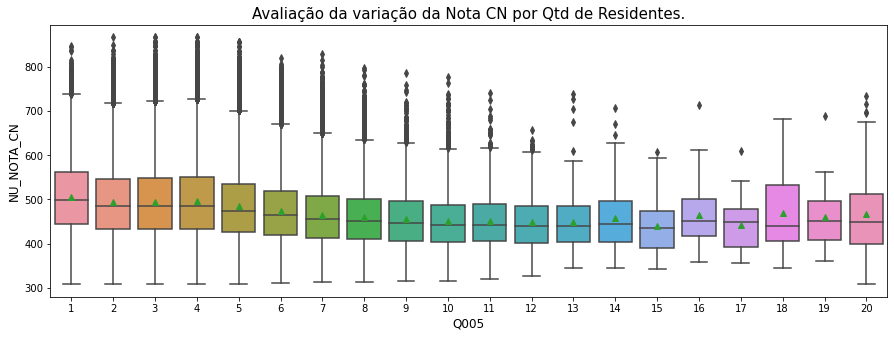

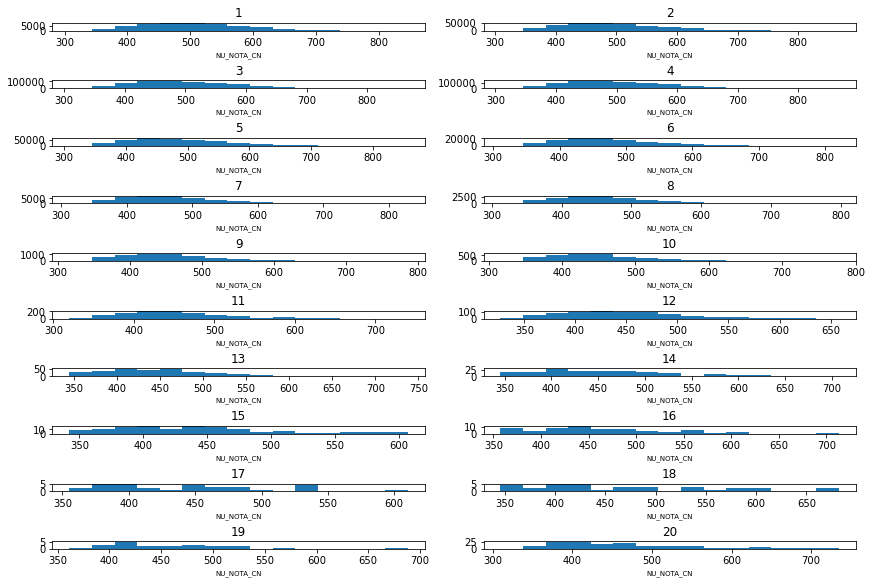




Avaliação da variação da Nota CN pela Renda Mensal


,"R$ 0,00","Até 1100,00","1100,01/1650,00","1650,01/2200,00","2200,01/2750,00","2750,01/3300,00","3300,01/4400,00","4400,01/5500,00","5500,01/6600,00","6600,01/7700,00","7700,01/8800,00","8800,01/9900,00","9900,01/11.000,00","11000,01/13.200,00","13200,01/16500,00","16500,01/22.000,00","Acima 22000,00"
count,113503.00,548929.00,347869.00,278503.00,144367.00,168461.00,148001.00,119073.00,75646.00,47077.00,37253.00,32651.00,47999.00,30128.00,32969.00,32919.00,40102.00
count_%,5.05,24.45,15.49,12.40,6.43,7.50,6.59,5.30,3.37,2.10,1.66,1.45,2.14,1.34,1.47,1.47,1.79
mean,449.18,458.56,475.20,485.19,495.61,502.76,513.80,523.56,531.28,537.72,541.76,544.99,550.02,556.62,561.17,566.41,571.38
std,61.93,64.03,68.87,71.96,75.13,76.99,79.66,82.02,83.35,83.61,84.82,84.89,85.26,85.91,85.74,86.53,87.99
min,307.60,308.70,308.30,309.60,309.10,310.30,308.80,310.60,311.00,322.50,339.00,318.50,337.00,339.80,340.00,339.70,339.70
25%,403.90,411.20,424.30,431.80,439.50,444.80,453.80,461.50,468.50,475.30,479.10,482.80,488.10,495.20,500.80,507.50,512.00
50%,441.50,451.40,468.20,478.40,489.60,497.80,510.90,522.50,532.00,539.60,544.50,548.40,554.50,562.30,566.60,573.20,578.30
75%,485.40,497.60,519.30,533.10,547.20,556.80,570.60,582.50,590.20,597.60,601.50,605.00,609.70,616.60,620.70,625.30,631.20
max,824.40,856.60,856.20,856.60,814.90,856.60,867.10,856.60,856.60,829.40,848.70,867.10,856.60,867.10,856.60,856.60,867.10


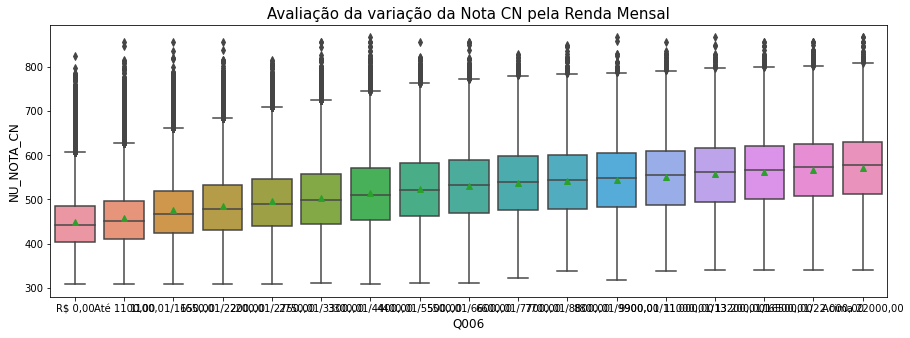

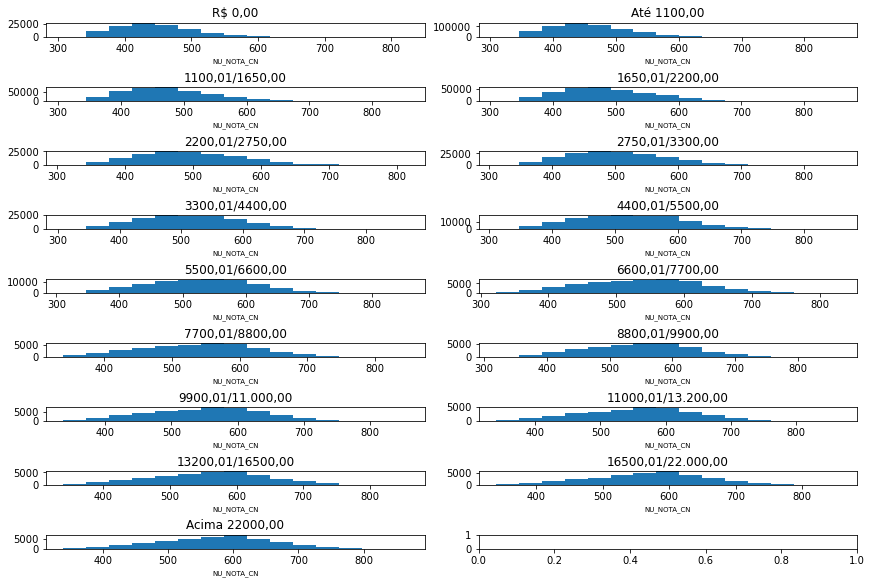




Avaliação da variação da Nota CN pela Qtd de Celulares na Residência


,0,1,2,3,4+
count,37478.00,320676.00,589743.00,716869.00,580684.00
count_%,1.67,14.28,26.26,31.93,25.86
mean,461.49,464.11,481.85,496.99,513.01
std,72.36,69.84,75.04,79.92,85.09
min,308.50,307.60,308.60,309.10,308.30
25%,408.20,412.70,425.90,436.50,447.40
50%,450.10,454.70,472.90,488.60,507.10
75%,502.00,505.20,530.00,551.90,573.60
max,856.60,856.60,867.10,867.10,867.10


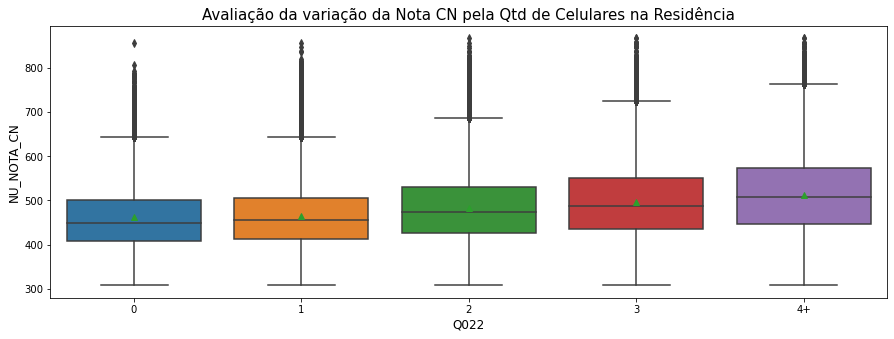

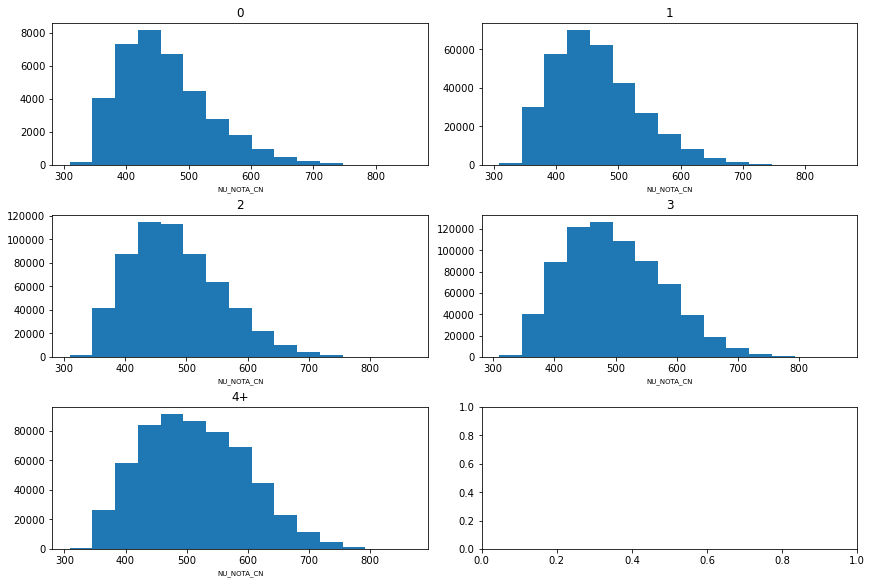




Avaliação da variação da Nota CN pela Qtd de Computadores na Residência


,0,1,2,3,4+
count,836428.00,956738.00,280026.00,113475.00,58783.00
count_%,37.25,42.61,12.47,5.05,2.62
mean,458.00,497.28,534.22,552.67,566.69
std,62.84,77.07,84.27,85.87,85.93
min,307.60,307.70,313.50,314.60,311.00
25%,411.50,439.30,471.20,490.80,507.90
50%,451.60,490.70,535.20,557.30,573.50
75%,497.00,550.50,594.10,612.30,625.60
max,846.30,858.80,867.10,867.10,867.10


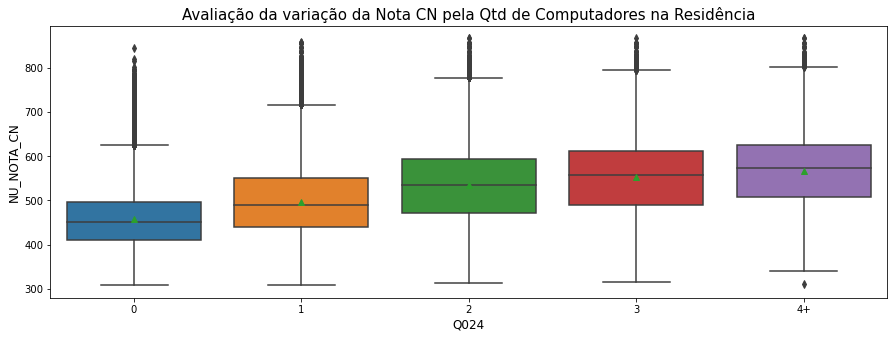

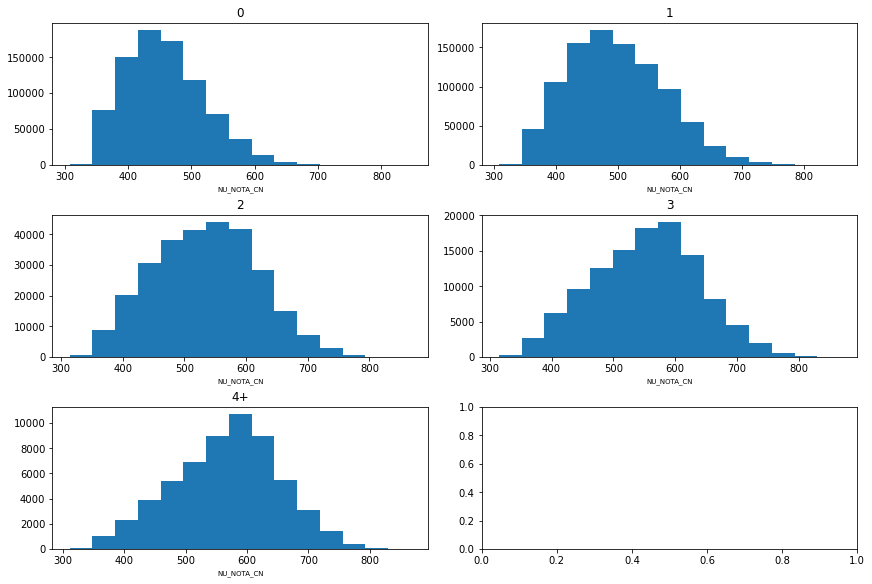




Avaliação da variação da Nota CN por Acesso a Internet na Residência


,NAO,SIM
count,190378.00,2055072.00
count_%,8.48,91.52
mean,451.25,495.64
std,60.90,80.85
min,308.50,307.60
25%,406.30,434.30
50%,445.00,486.40
75%,488.40,550.70
max,819.50,867.10


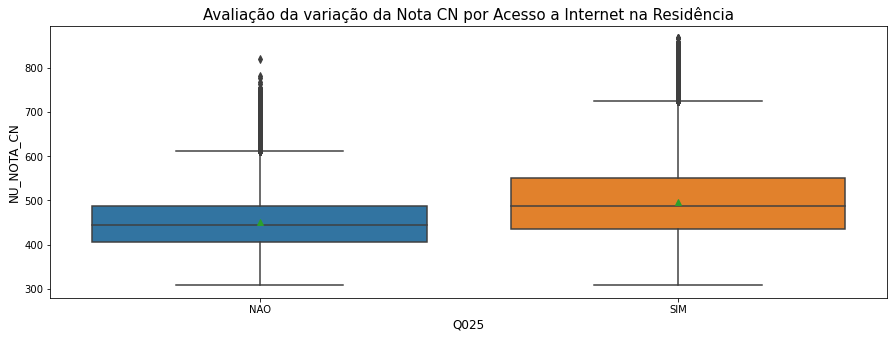

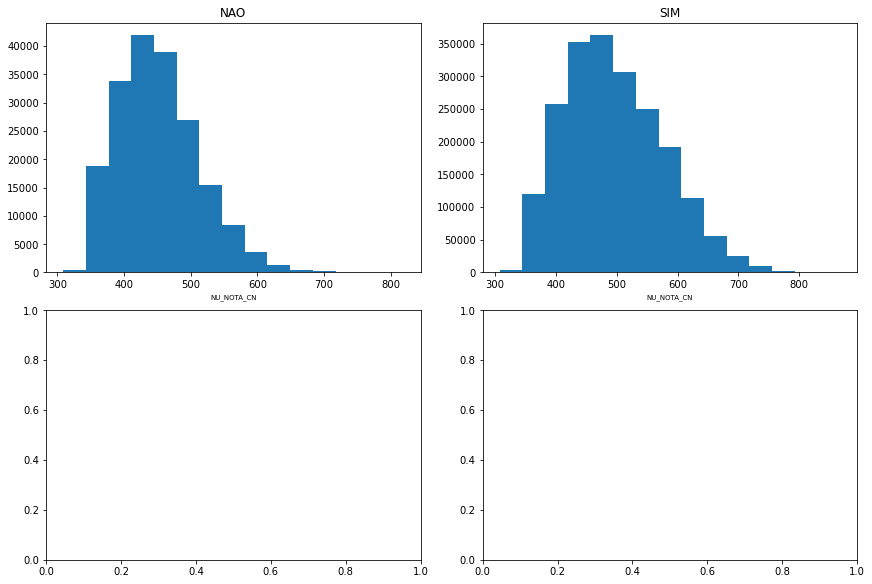

In [49]:
titulo = f'Avaliação da variação da Nota {nota} por Faixa Etária.'
coluna_1 = 'TP_FAIXA_ETARIA'                  # Clases
vrl_k = ['<17', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55',
         '56-60', '61-65', '66-70', '>70']
vrl_v = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = False
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por sexo'
coluna_1 = 'TP_SEXO'                  # Clases
Dicionario_Labels = {'SEXO_FEMININO':'F', 'SEXO_MASCULINO':'M'}
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por Raça'
coluna_1 = 'TP_COR_RACA'                  # Clases
Dicionario_Labels = {'Nao declarado':0, 'Branca':1, 'Preta':2, 'Parda':3, 'Amarela':4, 'Indigena':5, 'Nao dispoe da informacao':6}
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por Ano de Conclusão Ensino Médio.'
coluna_1 = 'TP_ANO_CONCLUIU'                  # Clases
vrl_k = ['Nao informado', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010',
         '2009', '2008', '2007', 'Antes 2007']
vrl_v = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por Escola Pública/Privada.'
coluna_1 = 'TP_ESCOLA'                  # Clases
Dicionario_Labels = {'Nao Respondeu':1, 'Publica':2, 'Privada':3}
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por região da aplicação da prova.'
coluna_1 = 'SG_UF_PROVA'                  # Clases
Dicionario_Labels = {}
UF = sorted(base['SG_UF_PROVA'].unique())
for i in UF:
    Dicionario_Labels[i] = i
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por Nível de Estudo do Responsável Homem.'
coluna_1 = 'Q001'                  # Clases
vrl_k = ['Nunca estudou', '5º Incompleto', '5º Fundamental', '9º Fundamental', 'Ensino Médio', 
         'Faculdade', 'Pós-graduação', 'Não sei']
vrl_v = sorted(base[base[coluna_1].notnull()][coluna_1].unique())
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por Nível de Estudo do Responsável Mulher.'
coluna_1 = 'Q002'                  # Clases
vrl_k = ['Nunca estudou', '5º Incompleto', '5º Fundamental', '9º Fundamental', 'Ensino Médio', 
         'Faculdade', 'Pós-graduação', 'Não sei']
vrl_v = sorted(base[base[coluna_1].notnull()][coluna_1].unique())
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por Qtd de Residentes.'
coluna_1 = 'Q005'                  # Clases
vrl_k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
vrl_v = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} pela Renda Mensal'
coluna_1 = 'Q006'                  # Clases
vrl_k = ['R$ 0,00', 'Até 1100,00', '1100,01/1650,00', '1650,01/2200,00', '2200,01/2750,00', '2750,01/3300,00', '3300,01/4400,00', 
 '4400,01/5500,00', '5500,01/6600,00', '6600,01/7700,00', '7700,01/8800,00', '8800,01/9900,00', '9900,01/11.000,00', 
 '11000,01/13.200,00', '13200,01/16500,00', '16500,01/22.000,00', 'Acima 22000,00']
vrl_v = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q']
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} pela Qtd de Celulares na Residência'
coluna_1 = 'Q022'                  # Clases
vrl_k = ['0', '1','2', '3', '4+']
vrl_v = sorted(base[base[coluna_1].notnull()][coluna_1].unique())
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} pela Qtd de Computadores na Residência'
coluna_1 = 'Q024'                  # Clases
vrl_k = ['0', '1','2', '3', '4+']
vrl_v = sorted(base[base[coluna_1].notnull()][coluna_1].unique())
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por Acesso a Internet na Residência'
coluna_1 = 'Q025'                  # Clases
Dicionario_Labels = {'NAO': 'A', 'SIM': 'B'}
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()